In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
sent = sent_tokenize(text)

In [ ]:
word = word_tokenize(text)

In [ ]:
len(word_tokenize(text))

30

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(word)

In [ ]:
# 상위 10개 단어
fdist.most_common(10)

[('is', 3),
 (',', 2),
 ('The', 2),
 ('.', 2),
 ('Hello', 1),
 ('Mr.', 1),
 ('Smith', 1),
 ('how', 1),
 ('are', 1),
 ('you', 1)]

In [ ]:
# 빈도표
import pandas as pd
freq_tab = pd.DataFrame({'word': fdist.keys(),
              'freq': fdist.values()})
freq_tab = freq_tab.sort_values('freq', ascending=False).head(10)

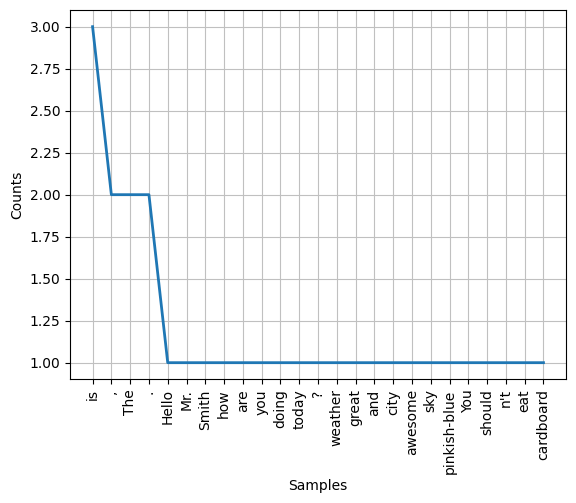

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot()

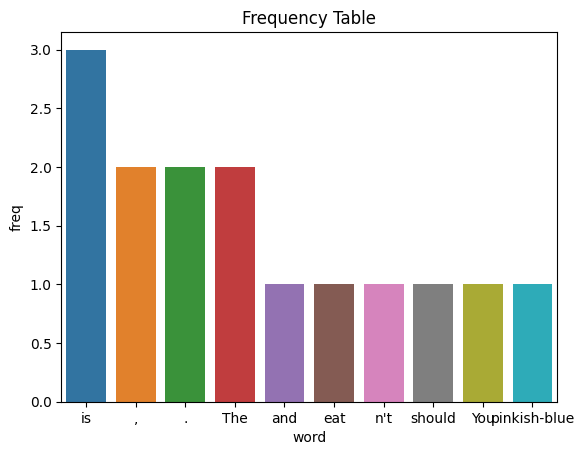

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=freq_tab.word, y=freq_tab.freq)
plt.title('Frequency Table')
plt.show()

In [ ]:
# 불용어제거
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw.append("n't")
sw.append('The')

w_lst = []
for w in word:
    if w not in sw:
        w_lst.append(w)

In [ ]:
w_lst = [w for w in word if w not in sw]

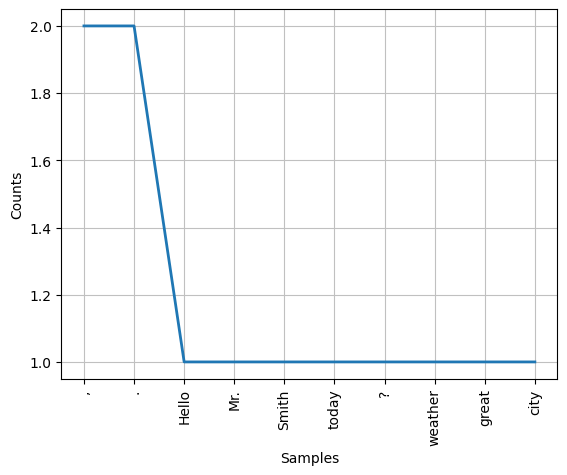

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist = FreqDist(w_lst)
fdist.plot(10)

In [ ]:
# 문장부호 제거
import string
string.punctuation
w_lst2 = []
for w in w_lst:
    if w not in string.punctuation:
        w_lst2.append(w)
w_lst2

['Hello',
 'Mr.',
 'Smith',
 'today',
 'weather',
 'great',
 'city',
 'awesome',
 'sky',
 'pinkish-blue',
 'You',
 'eat',
 'cardboard']

(-0.5, 399.5, 199.5, -0.5)

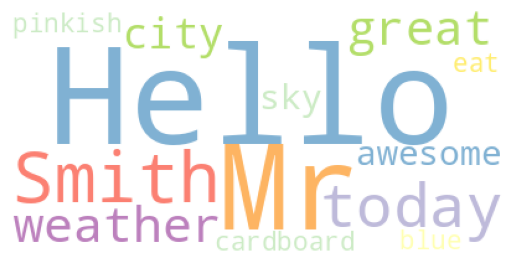

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      colormap='Set3').generate(text)
plt.imshow(wordcloud)
plt.axis('off')

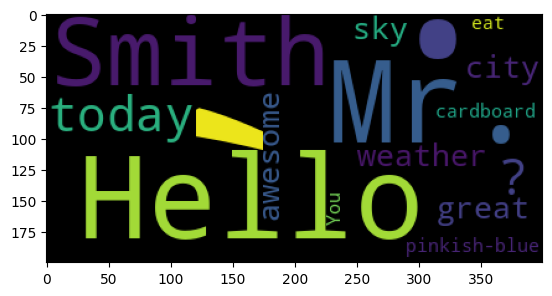

In [ ]:
# 빈도로 워드 클라우드 그릴때
wordcloud = WordCloud().generate_from_frequencies(fdist)
plt.imshow(wordcloud)

In [ ]:
# # 나눔 폰트 설치 (Nanum)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
from matplotlib import font_manager
font_manager.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.t

In [ ]:
# 폰트이름 가져오기
font_manager.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').get_name()

'NanumGothic'

In [ ]:
# 한글폰트 설정
from matplotlib import rc
rc('font', family='NanumGothic')

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 12.1 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
okt = Okt()
text = "여러분의 더 편리한 주문을 위해 가게 정렬 필터의 사용성을 개선했어요. 이제 쿠폰, 1인분, 배달팁, 별점 등 자주 사용하는 필터를 한눈에 확인할 수 있습니다. 우리의 하루에도 좋은 것만, 보고 싶은 것만 볼 수 있는 필터 기능이 있다면 얼마나 좋을까요? 배달의민족은 여러분에게 맛있는 것만 보여주는 필터가 될 수 있도록 최선을 다하겠습니다. 오늘도 배부르고 행복한 하루 보내세요!"

In [ ]:
word = okt.nouns(text)

In [ ]:
#단어 길이가 1개이상인 단어 추출
w_lst3 = []
for w in word:
    if len(w) > 1:
        w_lst3.append(w)

In [ ]:
stopword = ['위해']
w_lst4 = [w for w in w_lst3 if w not in stopword]

In [ ]:
FreqDist(w_lst4)

FreqDist({'필터': 4, '여러분': 2, '배달': 2, '하루': 2, '주문': 1, '가게': 1, '정렬': 1, '사용성': 1, '개선': 1, '이제': 1, ...})

In [ ]:
' '.join(w_lst4) #한글의 경우 전처리한 리스트를 문장으로 만들어서 워드 클라우드

'여러분 주문 가게 정렬 필터 사용성 개선 이제 쿠폰 인분 배달 자주 사용 필터 한눈 확인 우리 하루 보고 필터 기능 얼마나 배달 민족 여러분 필터 최선 오늘 하루'

# Exercise. hiphop.txt 파일을 열어서 빈도, 빈도그래프, 워드 클라우드 그리기

In [ ]:
text = open('/content/hiphop.txt').read()
text

'\ufeff"보고 싶다\n\n이렇게 말하니까 더 보고 싶다\n\n너희 사진을 보고 있어도\n\n보고 싶다\n\n너무 야속한 시간\n\n나는 우리가 밉다\n\n이젠 얼굴 한번 보는 것 조차\n\n힘들어진 우리가\n\n여긴 온통 겨울 뿐이야\n\n8월에도 겨울이 와\n\n마음은 시간을 달려가네\n\n홀로 남은 설국열차\n\n니 손 잡고 지구 반대편까지 가\n\n겨울을 끝내고파\n\n그리움들이 얼마나\n\n눈처럼 내려야 그 봄날이 올까\n\nFriend\n\n허공을 떠도는\n\n작은 먼지처럼 작은 먼지처럼\n\n날리는 눈이 나라면\n\n조금 더 빨리\n\n네게 닿을 수 있을 텐데\n\n눈꽃이 떨어져요\n\n또 조금씩 멀어져요\n\n보고 싶다 보고 싶다\n\n보고 싶다 보고 싶다\n\n얼마나 기다려야\n\n또 몇 밤을 더 새워야\n\n널 보게 될까 널 보게 될까\n\n만나게 될까 만나게 될까\n\n추운 겨울 끝을 지나\n\n다시 봄날이 올 때까지\n\n꽃 피울 때까지\n\n그곳에 좀 더 머물러줘 \n\n머물러줘\n\n니가 변한 건지\n\n니가 변한 건지\n\n아니면 내가 변한 건지\n\n내가 변한 건지\n\n이 순간 흐르는 시간조차 미워\n\n우리가 변한 거지 뭐\n\n모두가 그런 거지 뭐\n\n그래 밉다 니가 넌 떠났지만\n\n단 하루도 너를\n\n잊은 적이 없었지 난\n\n솔직히 보고 싶은데\n\n이만 너를 지울게\n\n그게 널 원망하기보단\n\n덜 아프니까\n\n시린 널 불어내 본다\n\n연기처럼 하얀 연기처럼\n\n말로는 지운다 해도\n\n사실 난 아직 널 보내지 못하는데\n\n눈꽃이 떨어져요\n\n또 조금씩 멀어져요\n\n보고 싶다 보고 싶다\n\n보고 싶다 보고 싶다\n\n얼마나 기다려야\n\n또 몇 밤을 더 새워야\n\n널 보게 될까 널 보게 될까\n\n만나게 될까 만나게 될까\n\nYou know it all\n\nYou\'re my best friend\n\n아침은 다시 올 거야\n\n어떤 어둠도 어떤 계절도\n\n영원할 순 없으니까\n\n벚꽃이 피

In [ ]:
# 단어로 자르기
okt = Okt()
words = okt.nouns(text)

In [ ]:
# 전처리
words = [w for w in words if len(w) > 1]

In [ ]:
# 빈도테이블
fdist = FreqDist(words)
fdist.most_common(10)

[('하나', 75),
 ('오늘', 53),
 ('사랑', 50),
 ('우리', 48),
 ('시간', 41),
 ('이제', 40),
 ('지금', 40),
 ('보고', 38),
 ('아이야', 36),
 ('역사', 31)]

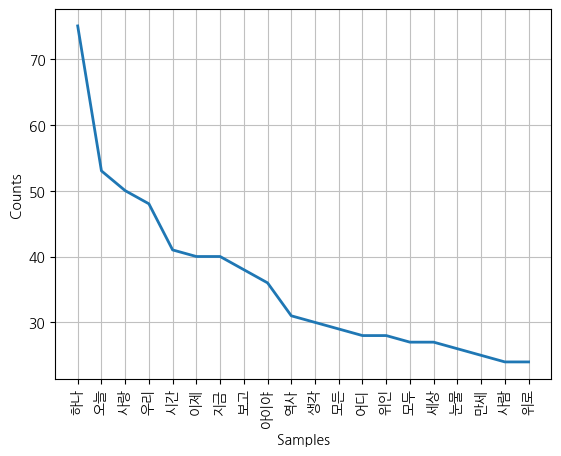

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 빈도그래프
fdist.plot(20)

In [ ]:
font_manager.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.t

(-0.5, 399.5, 199.5, -0.5)

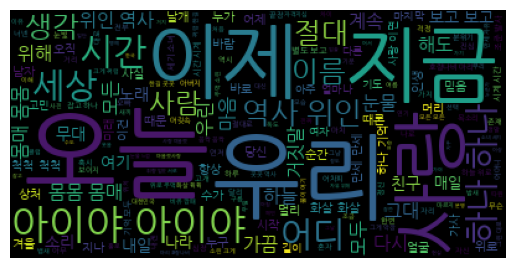

In [ ]:
# 워드클라우드
text2 = ' '.join(words)
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text2)
plt.imshow(wordcloud)
plt.axis('off')

# 웹스크래핑

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
page = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
page.content
soup = BeautifulSoup(page.content, 'html.parser')
soup.title
soup.body
soup.p.text

'Here is some simple content for this page.'

In [ ]:
page = requests.get('http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html')
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First paragraph.
   </p>
   <p class="inner-text">
    Second paragraph.
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    First outer paragraph.
   </b>
  </p>
  <p class="outer-text">
   <b>
    Second outer paragraph.
   </b>
  </p>
 </body>
</html>


In [ ]:
soup.find_all('p')[3]
len(soup.find_all('p'))

4

In [ ]:
t_lst = []
for t in soup.find_all('p', class_='first-item'):
    print(t.text.strip())
    t_lst.append(t.text.strip())
t_lst

First paragraph.
First outer paragraph.


['First paragraph.', 'First outer paragraph.']

In [ ]:
# outer-text만 뽑기
o_lst = []
for t in soup.find_all(class_='outer-text'):
    o_lst.append(t.text.strip())
o_lst

['First outer paragraph.', 'Second outer paragraph.']

In [ ]:
# first id만 뽑기
soup.find_all(id='first')[0].text.strip()
soup.find_all('p', {'id':'first'})[0].text.strip()
soup.select('p#first')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

In [ ]:
# p에 있는 first-item class 추출
soup.select('p.first-item')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>]

In [ ]:
# 개발자도구에서 복사해서 사용할 수 있음
soup.select('body > p:nth-child(3) > b')

[<b>
                 Second outer paragraph.
             </b>]

# Exercise. 날씨 데이터 가져오기

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#weather scrapping
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')

In [18]:
#extracting this week weather
period_tags = soup.select("p.period-name")
short_desc_tags = soup.select("p.short-desc")
temp_tags = soup.select("p.temp")
desc_tags = soup.select("img.forecast-icon")

In [19]:
periods = [pt.get_text() for pt in period_tags]
short_descs = [sd.get_text() for sd in short_desc_tags]
temps = [t.get_text() for t in temp_tags]
descs = [d["title"] for d in desc_tags]

In [20]:
print(periods)
print(short_descs)
print(temps)
print(descs)

['Today', 'Tonight', 'Wednesday', 'WednesdayNight', 'Thursday', 'ThursdayNight', 'Friday', 'FridayNight', 'Saturday']
['BecomingSunny', 'Partly Cloudy', 'Mostly Sunnythen Sunnyand Breezy', 'Mostly Clearand Breezythen MostlyClear', 'Sunny', 'Mostly Clearand Breezythen PartlyCloudy', 'Sunny', 'Mostly Clear', 'Sunny']
['High: 70 °F', 'Low: 54 °F', 'High: 68 °F', 'Low: 56 °F', 'High: 69 °F', 'Low: 54 °F', 'High: 75 °F', 'Low: 58 °F', 'High: 79 °F']
['Today: Partly sunny, then gradually becoming sunny, with a high near 70. West southwest wind 6 to 16 mph, with gusts as high as 21 mph. ', 'Tonight: Partly cloudy, with a low around 54. Southwest wind 9 to 15 mph, with gusts as high as 18 mph. ', 'Wednesday: Mostly sunny, with a high near 68. Breezy, with a west southwest wind 13 to 23 mph, with gusts as high as 29 mph. ', 'Wednesday Night: Mostly clear, with a low around 56. Breezy, with a west southwest wind 14 to 24 mph, with gusts as high as 30 mph. ', 'Thursday: Sunny, with a high near 69

In [23]:
weather = pd.DataFrame({"period":periods,"short_desc":short_descs,"temp":temps,"desc":descs})
weather.dtypes

period        object
short_desc    object
temp          object
desc          object
dtype: object

In [24]:
# 온도를 split해서 숫자 데이터 타입으로 전환
weather['temp_num'] = weather.temp.apply(lambda x: x.split(' ')[1]).astype('int')
weather.dtypes

period        object
short_desc    object
temp          object
desc          object
temp_num       int64
dtype: object

In [28]:
#this week temp plot
weather_night = weather[weather.temp.str.contains("Low") == True]
weather_day = weather[weather.temp.str.contains("Low") == False]

,period,short_desc,temp,desc,temp_num
0,Today,BecomingSunny,High: 70 °F,"Today: Partly sunny, then gradually becoming s...",70
2,Wednesday,Mostly Sunnythen Sunnyand Breezy,High: 68 °F,"Wednesday: Mostly sunny, with a high near 68. ...",68
4,Thursday,Sunny,High: 69 °F,"Thursday: Sunny, with a high near 69. West sou...",69
6,Friday,Sunny,High: 75 °F,"Friday: Sunny, with a high near 75.",75
8,Saturday,Sunny,High: 79 °F,"Saturday: Sunny, with a high near 79.",79


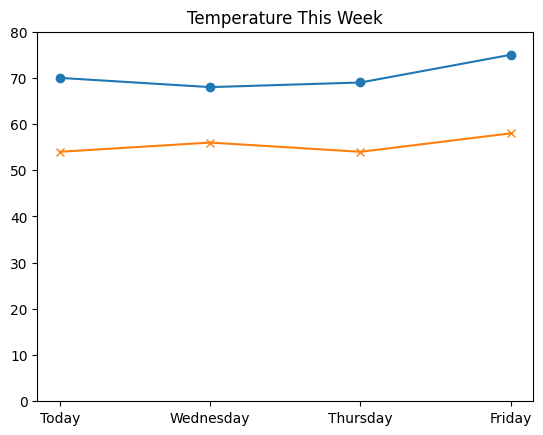

In [29]:
import matplotlib.pyplot as plt
plt.plot(weather_day.period[:-1], weather_day.temp_num[:-1], marker='o')
plt.plot(weather_day.period[:-1], weather_night.temp_num, marker='x')
plt.title('Temperature This Week')
plt.ylim(0,80)
plt.show()

In [30]:
day_avg = round(weather_day.temp_num.mean(),2)
print("이번주 낮평균온도: {:.2f}도".format(day_avg))
print("이번주 낮평균온도: %.2f도" % (day_avg))

이번주 낮평균온도: 72.20도
이번주 낮평균온도: 72.20도


In [31]:
weather.to_excel('weather_day.xlsx')
weather.to_csv('weather_day.csv')